In [265]:
import glob
import os
from math import sqrt

import numpy as np
import cv2
import pandas as pd

In [301]:
d = {
    "222": 1.177e-10,
    "113": 1.230e-10,
    "022": 1.442e-10,
    "002": 2.039e-10,
    "111": 2.355e-10,
    "211": 1.67e-10,
    "004": 1.03e-10,
    "110": 2.87e-10
}

U = 100e3
e = 1.60217e-19
c = 2.997e8
h = 6.61e-34
me = 9.109e-31

lambda_e = h * c / sqrt((e * U) ** 2 + 2 * e * U * me * c ** 2)

half_angles = {
    k: np.arcsin(lambda_e / v / 2) * 1000 * 2 for k, v in d.items()
}
half_angles

AttributeError: 'list' object has no attribute 'items'

/tmp/ipykernel_121095/1114370098.py:14: RuntimeWarning: divide by zero encountered in log
  image_log = np.log(cv2.imread(images[1], cv2.IMREAD_UNCHANGED) + 1)


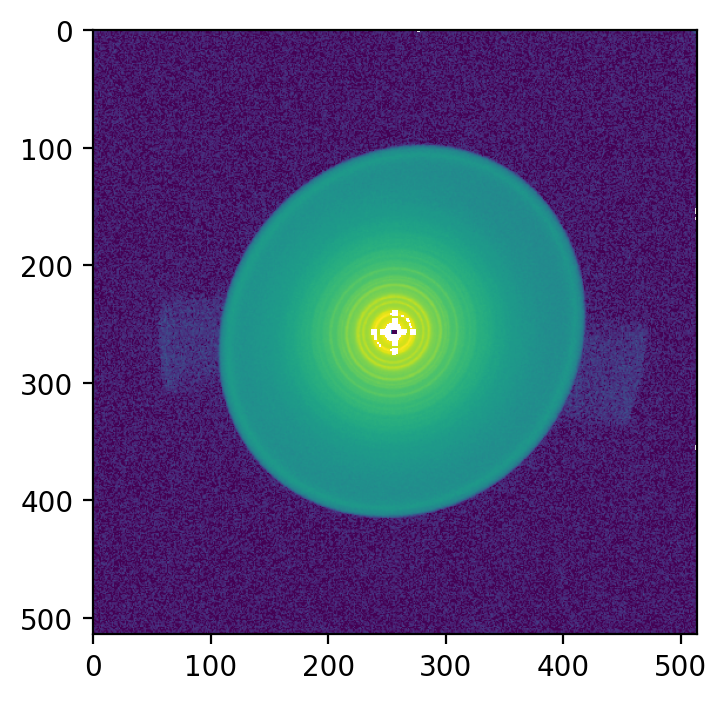

In [267]:
images = glob.glob("./data/images/*.tiff")


def get_calibration_angle(file_name):
    return file_name.split("_")[-2]


calibrations = {
    file_name: float(get_calibration_angle(file_name)) for file_name in images
}



image_log = np.log(cv2.imread(images[1], cv2.IMREAD_UNCHANGED) + 1)

from matplotlib import pyplot as plt

plt.figure(dpi=200)
plt.imshow(image_log)
plt.show()


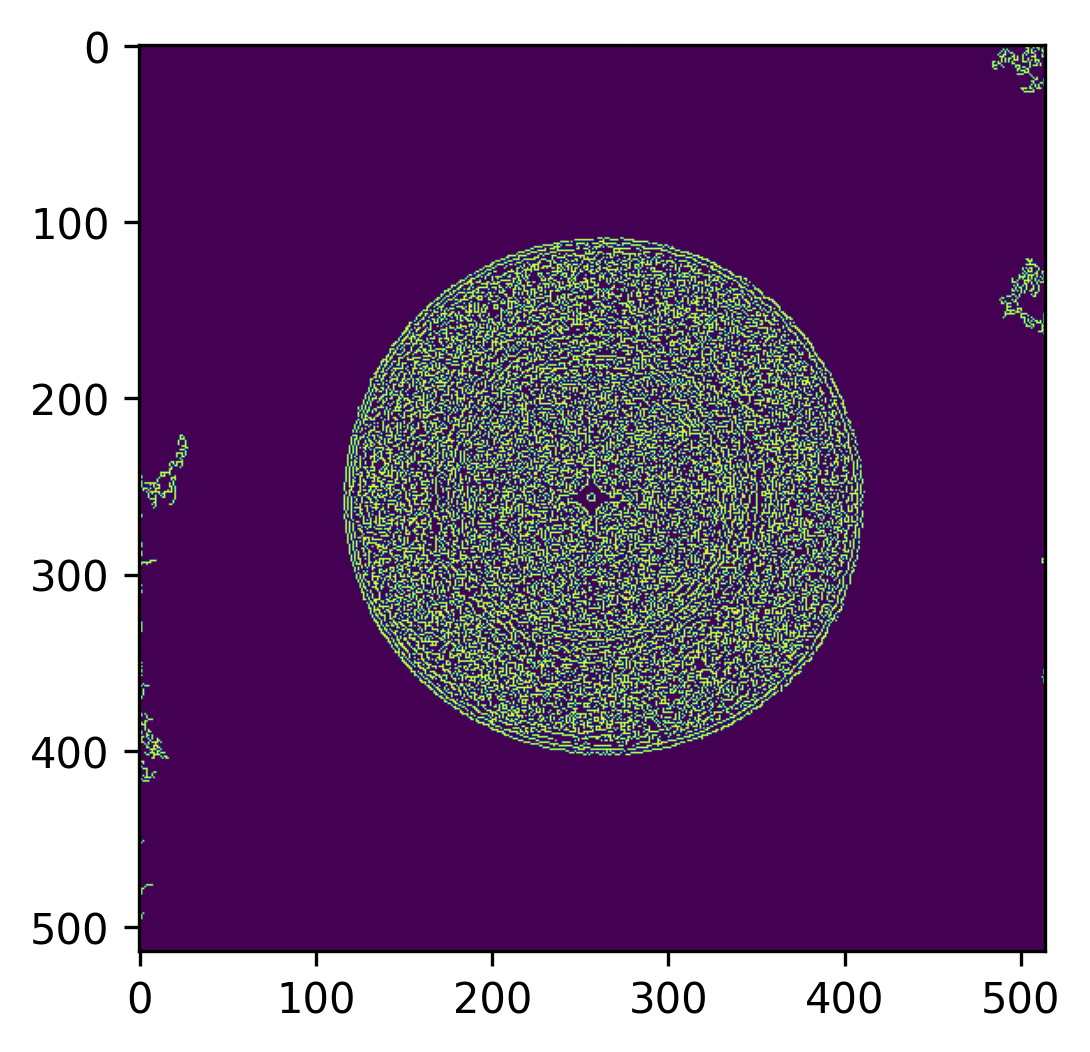

In [268]:
from skimage.transform import hough_circle
image = cv2.imread(images[0], cv2.IMREAD_UNCHANGED)
calibration = calibrations[images[0]]
canny = cv2.Canny((image).astype(np.uint8), 3, 100)
plt.figure(dpi=300)
plt.imshow(canny)
plt.show()


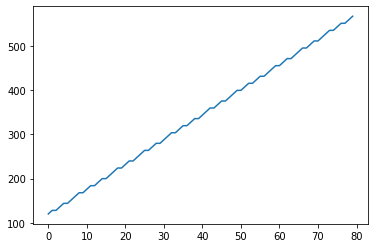

In [269]:
circles = hough_circle(image > 5, list(range(20,  100, 1)), normalize=False)

x = {k: np.unravel_index(np.argmax(circles[k, ...]), circles[k, ...].shape) for k in range(circles.shape[0])}

plt.close()
plt.plot([np.amax(circles[k, ...]) for k in range(circles.shape[0])])
plt.show()

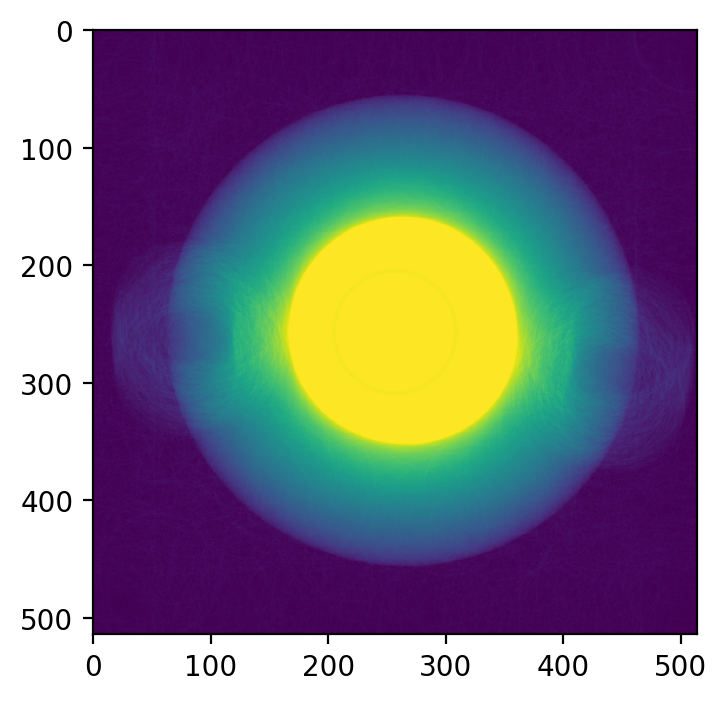

In [270]:
plt.figure(dpi=200)
plt.imshow(circles[32, ...])

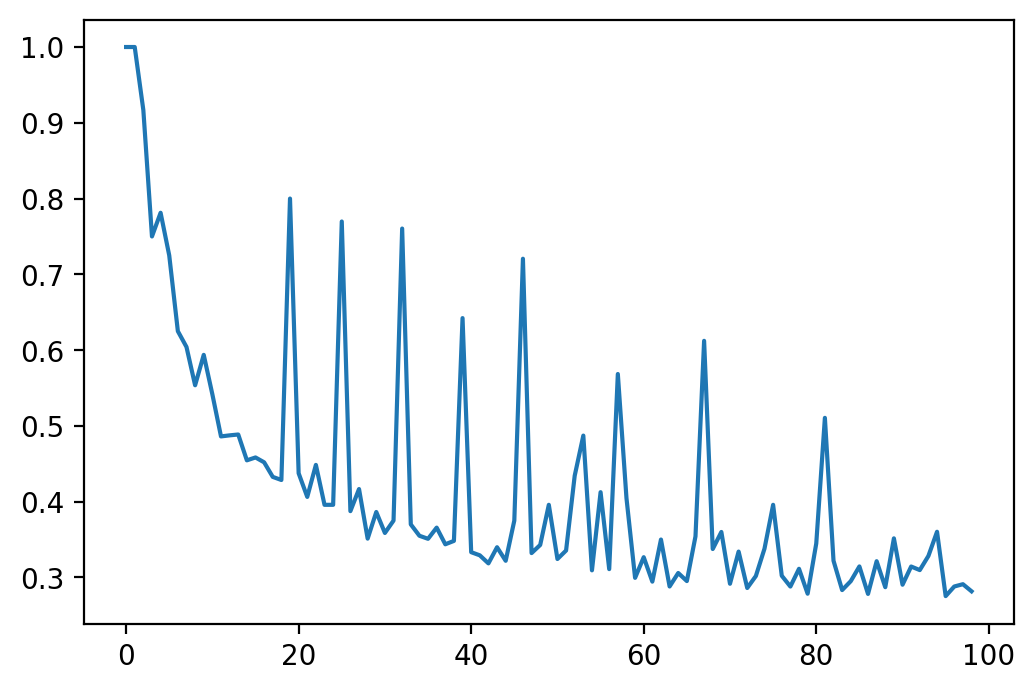

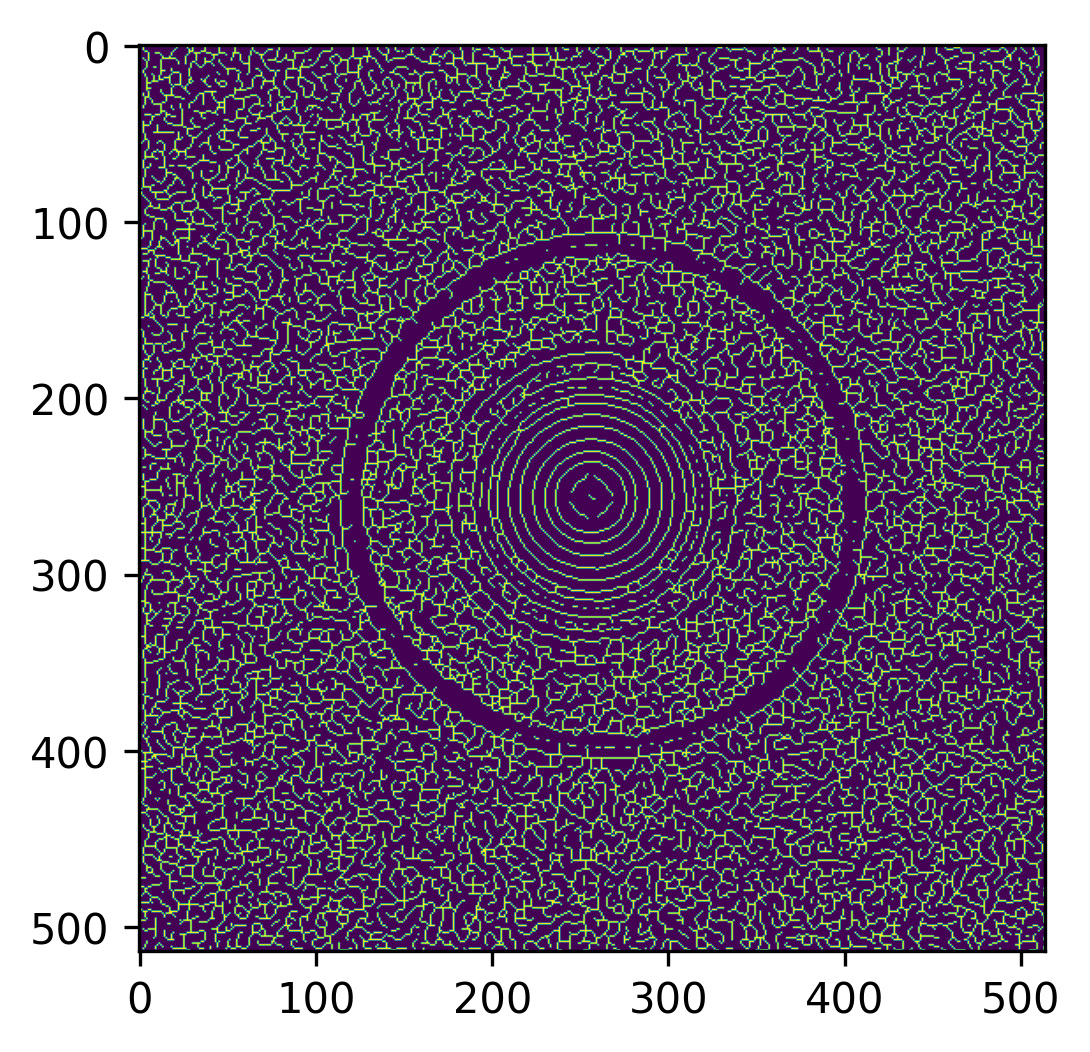

In [296]:
from skimage.morphology import skeletonize

image_result = cv2.Laplacian(image, ddepth=cv2.CV_16U, ksize=9)
# image_result = cv2.erode(image_result, np.ones((5, 5)))
# image_result = closing(image_result)
image_result = skeletonize(image_result > 0.01 * np.amax(image_result))
radix = list(range(1,  100, 1))
circles = hough_circle(image_result > 0.01 * np.amax(image_result), radix, normalize=True)

x = {k: np.unravel_index(np.argmax(circles[k, ...]), circles[k, ...].shape) for k in range(circles.shape[0])}
y = [np.amax(circles[k, ...]) for k in range(circles.shape[0])]
plt.close()
plt.figure(dpi=200)
plt.plot([np.amax(circles[k, ...]) for k in range(circles.shape[0])])
plt.show()
plt.figure(dpi=300)
plt.imshow(image_result)
plt.show()

In [297]:
from scipy.signal import find_peaks_cwt

circle_radix = [radix[idx] for idx in find_peaks_cwt(y, widths=1)]
calibration = calibrations[images[0]]
print(calibration)

for k, v in half_angles.items():
    for c in circle_radix:
        print(f"{k} and {v * image.shape[0] / c}")


274.21
222 and 8062.831533225584
222 and 1465.969369677379
222 and 767.8887174500557
222 and 597.2467802389322
222 and 474.28420783679906
222 and 403.1415766612792
222 and 343.0992141798121
222 and 298.6233901194661
222 and 273.3163231601893
222 and 237.14210391839953
222 and 212.17977719014695
222 and 196.6544276396484
222 and 179.17403407167964
222 and 169.74382175211755
113 and 7715.382027915169
113 and 1402.7967323482126
113 and 734.7982883728732
113 and 571.509779845568
113 and 453.84600164206876
113 and 385.7691013957584
113 and 328.314128847454
113 and 285.754889922784
113 and 261.5383738276328
113 and 226.92300082103438
113 and 203.03636915566233
113 and 188.1800494613456
113 and 171.45293395367042
113 and 162.42909532452987
022 and 6581.014428290524
022 and 1196.5480778710044
022 and 626.7632788848118
022 and 487.48255024374254
022 and 387.1184957817955
022 and 329.0507214145262
022 and 280.04316716129887
022 and 243.74127512187127
022 and 223.0852348573059
022 and 193.5592478

In [273]:
images[0]

'./data/images/serie_4_angle_274.21_mrad.tiff'